# **Importing Libraries**

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import numpy as np

# **Part 1: Data Preprocessing**

# **1. Load the Dataset**

In [149]:
data = pd.read_csv("Netflix_Userbase.csv")

# **2. Missing Values**

In [150]:
data.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

# **3. Encode Categorical Variables**

In [151]:
data_dummies = pd.get_dummies(data, drop_first=True)
data_dummies['Monthly Revenue']=(data['Monthly Revenue']>10).astype(int)

# **4. Feature Selection**

In [152]:
X = data_dummies.drop(['Monthly Revenue','Age'], axis=1)
y = data_dummies['Monthly Revenue']

# **Part 2: Exploratory Data Analysis (EDA)**

# **1. Descriptive Statistics**

In [153]:
X.describe()

,User ID,Subscription Type_Premium,Subscription Type_Standard,Join Date_01-05-23,Join Date_01-06-22,Join Date_01-07-22,Join Date_01-08-22,Join Date_01-09-22,Join Date_01-10-22,Join Date_01-11-22,...,Country_Germany,Country_Italy,Country_Mexico,Country_Spain,Country_United Kingdom,Country_United States,Gender_Male,Device_Smart TV,Device_Smartphone,Device_Tablet
count,2500.00000,2500.00000,2500.000000,2500.0000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,...,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,1250.50000,0.29320,0.307200,0.0004,0.001200,0.007600,0.005200,0.004800,0.002800,0.007600,...,0.073200,0.073200,0.073200,0.180400,0.073200,0.180400,0.497200,0.244000,0.248400,0.253200
std,721.83216,0.45532,0.461425,0.0200,0.034627,0.086863,0.071938,0.069129,0.052851,0.086863,...,0.260517,0.260517,0.260517,0.384597,0.260517,0.384597,0.500092,0.429579,0.432171,0.434932
min,1.00000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,625.75000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1250.50000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1875.25000,1.00000,1.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,2500.00000,1.00000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **2. Visualizations**

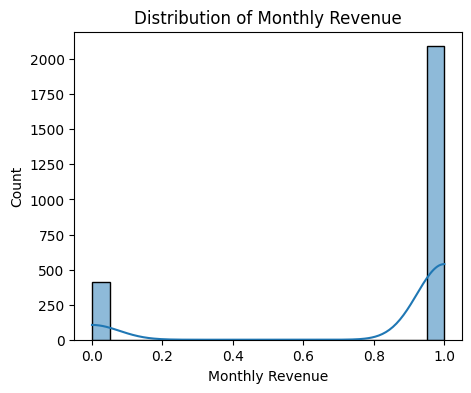

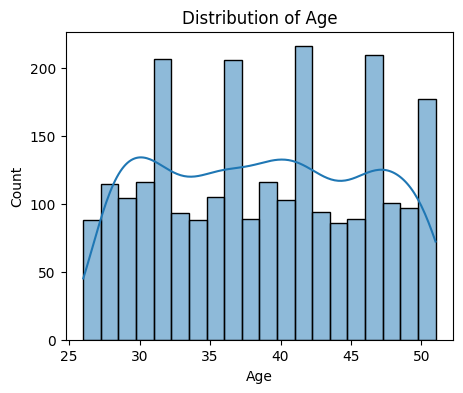

In [154]:
plt.figure(figsize=(5, 4))
sns.histplot(data_dummies['Monthly Revenue'], bins=20, kde=True)
plt.title('Distribution of Monthly Revenue')
plt.xlabel('Monthly Revenue')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(5, 4))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# **Part 3: Linear Regression Model (Predicting Monthly Revenue)**


# **1. Build the Model**

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [156]:
y_pred = lr_model.predict(X_test)

# **2. Model Evaluation**

In [157]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Evaluation:")
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Linear Regression Model Evaluation:
Root Mean Squared Error (RMSE): 0.3998837643949078
R-squared (R2): -0.13328862527740704


# **Part 4: Logistic Regression Model (Predicting Customer Feedback)**

# **1. Model Building**

In [158]:
data_dummies['Feedback'] = (data_dummies['Monthly Revenue'] > data_dummies['Monthly Revenue'].mean()).astype(int)

X_logistic = data_dummies.drop(['Monthly Revenue', 'Feedback'], axis=1)
y_logistic = data_dummies['Feedback']

In [159]:
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=42)

In [160]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_logistic, y_train_logistic)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [161]:
y_pred_logistic = logistic_model.predict(X_test_logistic)

# **2. Model Evaluation**

In [162]:
accuracy = accuracy_score(y_test_logistic, y_pred_logistic)
precision = precision_score(y_test_logistic, y_pred_logistic)
recall = recall_score(y_test_logistic, y_pred_logistic)
f1 = f1_score(y_test_logistic, y_pred_logistic)
conf_matrix = confusion_matrix(y_test_logistic, y_pred_logistic)

print("Logistic Regression Model Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Logistic Regression Model Evaluation:
Accuracy: 0.83
Precision: 0.83
Recall: 1.0
F1 Score: 0.9071038251366119
Confusion Matrix:
[[  0  85]
 [  0 415]]


# **Part 5: Comparative Analysis and Visualization**

# **1. Feature Importance**

In [163]:
logistic_coef = pd.DataFrame({'Feature': X_logistic.columns, 'Coefficient': logistic_model.coef_[0]})
logistic_coef = logistic_coef.sort_values(by='Coefficient', ascending=False)

print("\nFeature Importance for Logistic Regression Model:")
print(logistic_coef)


Feature Importance for Logistic Regression Model:
                        Feature  Coefficient
309  Last Payment Date_08-07-23     0.970106
314  Last Payment Date_12-07-23     0.775880
330              Country_France     0.761942
261          Join Date_27-06-22     0.721325
320  Last Payment Date_23-06-23     0.675379
..                          ...          ...
310  Last Payment Date_09-07-23    -0.652952
196          Join Date_20-08-22    -0.728571
313  Last Payment Date_11-07-23    -0.809978
99           Join Date_10-08-22    -0.835248
315  Last Payment Date_13-07-23    -0.998228

[341 rows x 2 columns]


In [164]:
linear_coef = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lr_model.coef_})

print("\nFeature Importance for Linear Regression Model:")
print(linear_coef)


Feature Importance for Linear Regression Model:
                        Feature  Coefficient
0                       User ID    -0.000018
1     Subscription Type_Premium    -0.031215
2    Subscription Type_Standard     0.014013
3            Join Date_01-05-23    -1.040103
4            Join Date_01-06-22    -0.481904
..                          ...          ...
335       Country_United States     0.021858
336                 Gender_Male     0.020423
337             Device_Smart TV    -0.040383
338           Device_Smartphone    -0.035237
339               Device_Tablet    -0.018224

[340 rows x 2 columns]


# **2. Insights**

1. Feature Importance Comparison:
   - From the logistic regression model, we can see which features have the most significant impact on predicting customer feedback (positive/negative).
   - On the other hand, in the linear regression model, we observe the features that are most influential in predicting monthly revenue.

2. Interpretation:
   - In the logistic regression model, features with higher positive coefficients contribute more towards predicting positive feedback, while those with higher negative coefficients might contribute more towards predicting negative feedback.
   - In the linear regression model, features with higher positive coefficients positively impact monthly revenue, while those with higher negative coefficients might have a negative effect on revenue.

3. Potential Insights:
   - By comparing feature importance between the two models, we can identify overlaps or disparities in the factors affecting feedback and revenue.